In [231]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [232]:
data=pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [233]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [234]:
# Linear Regression 
class LinearRegression() : 
	
	def __init__( self,learning_rate = 0.1 ,iterations = 1500 ) : 
		self.learning_rate = learning_rate 
		self.iterations = iterations 
		self.y_preds=[]
	# Function for model training 
	def fit( self, X, Y ) : 
		# no_of_training_examples, no_of_features 
		self.m, self.n = X.shape 
		# weight initialization 
		self.W = np.zeros( self.n ) 
		self.b = 0
		self.X = X 
		self.Y = Y 

		# gradient descent learning 
		for i in range( self.iterations ) : 
			self.update_weights() 			
		return self	

	def update_weights( self ) : 
		Y_pred = self.predict( self.X ) 
		# calculate gradients 
		dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m 
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
		# update weights 
		
		self.W = self.W - self.learning_rate * dW 
		self.b = self.b - self.learning_rate * db 		
		mse = mean_squared_error(self.Y, Y_pred)
		self.y_preds.append(mse)
		return self
	def plotweights(self):
		plt.plot(self.y_preds)
		plt.xlabel('iteration')
		plt.ylabel('error')
		plt.show()

	def predict( self, X ) : 	
		return X.dot( self.W ) + self.b 

In [235]:
# Convert categorical variables to one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [236]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [237]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features (age, bmi)
scaler = StandardScaler()
data[['age', 'bmi',]] = scaler.fit_transform(data[['age', 'bmi']])


In [238]:
from sklearn.model_selection import train_test_split

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [239]:

# Create and train the linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute  Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 33780509.564390704
Mean Absolute  Error: 4145.450551780105
R-squared: 0.769611805507837


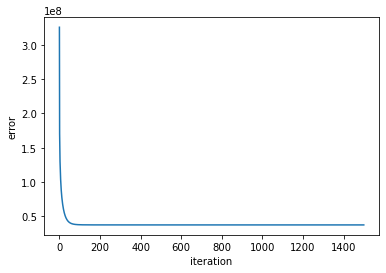

In [240]:
model.plotweights()

In [241]:
# Linear Regression 
class PolynomialRegression() : 
	
	def __init__( self,degree=2,learning_rate = 0.1 ,iterations = 1500) : 
		self.learning_rate = learning_rate 
		self.iterations = iterations
		self.degree=degree
		self.y_preds=[]
  
	def fit( self, X, Y ) : 
		self.m, self.n = X.shape 
		self.W = np.zeros((self.degree+1,self.n))
		self.b = 0
		self.X = X 
		self.Y = Y 

		for i in range( self.iterations ) : 
			self.update_weights() 			
		return self	

	def update_weights( self ) : 
		Y_pred = self.predict( self.X ) 
		for i in range(0,self.degree+1):			
			dW = -1* ( self.X.T**i).dot( self.Y - Y_pred ) / self.m 
			self.W[i] = self.W[i] - self.learning_rate * dW 
		mse = mean_squared_error(self.Y, Y_pred)
		self.y_preds.append(mse)
		return self
	def plotweights(self):
		plt.plot(self.y_preds)
		plt.xlabel('iteration')
		plt.ylabel('error')
		plt.show()

	def predict(self, X) :
		Y_pred=np.zeros((X.shape[0]))
		for i in range(self.degree+1): 
			X_pow=np.power(X,i)
			doted=X_pow.dot(self.W[i])
			Y_pred=np.add(Y_pred,doted)
		return Y_pred


In [242]:
model=PolynomialRegression(degree=2,learning_rate=0.05,iterations=350)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute  Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 33446228.387703218
Mean Absolute  Error: 4187.319364083126
R-squared: 0.7718916537914441


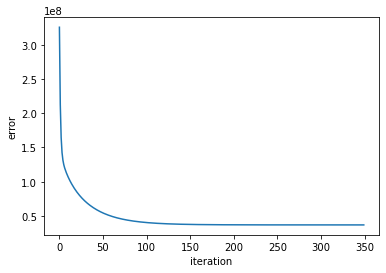

In [243]:
model.plotweights()